### Edge detection and probabilistic hough line detection

Sangam Deuja$^{1}$

$^{1}$Integrify, Helsinki, Finland 

**Abstract** We study machine leanring methods for continuous condition montioring of road markings. 

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
# Reference for canny edge detection http://homepages.inf.ed.ac.uk/rbf/HIPR2/canny.htm
# HoughLines can only be implemented in binary image. In our case thresholding or canny operation are suitable methods.

In [3]:
img = cv2.imread('test.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
blur1 = cv2.GaussianBlur(gray,(5,5),1)
blur2 = cv2.GaussianBlur(gray,(5,5),2)
#plt.imshow(gray)

In [4]:
edge1=cv2.Canny(blur1, 5, 128,apertureSize=3,L2gradient=True)
edge2=cv2.Canny(blur2, 5, 200,apertureSize=3,L2gradient=True)

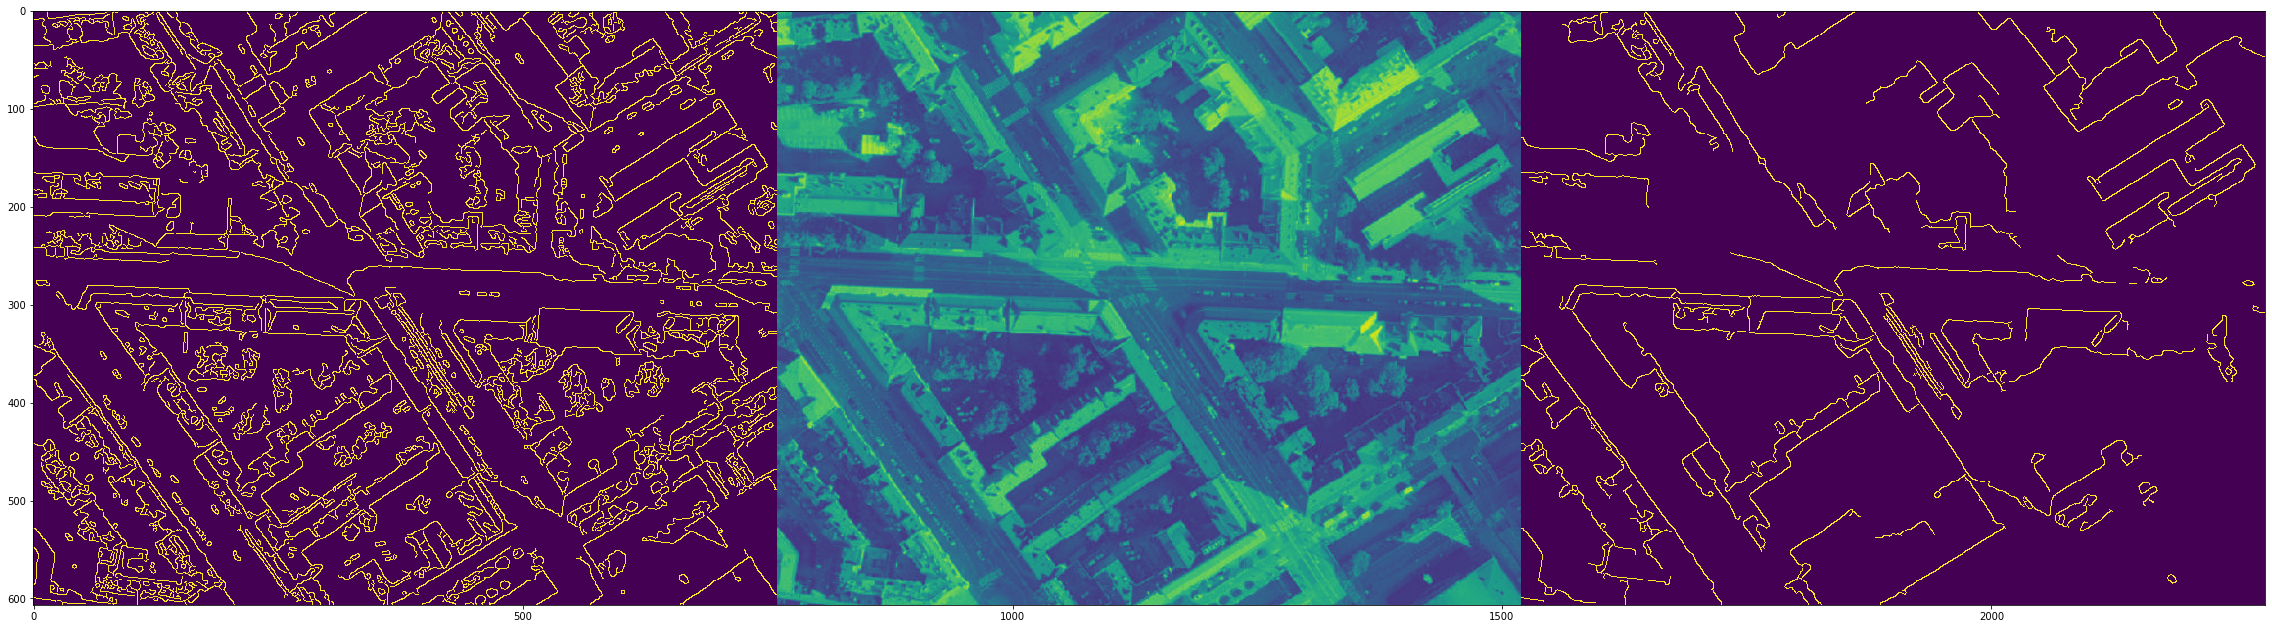

In [5]:
plt.figure(figsize=(40,120))
plt.imshow(np.hstack((edge1,gray,edge2)))

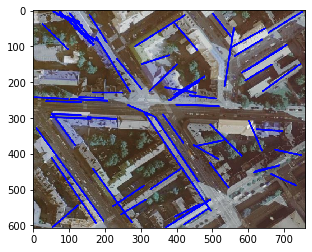

In [6]:
linesP = cv2.HoughLinesP(edge1, 1, np.pi /180,20, None, 70, 10)
if linesP is not None:
        for i in range(0, len(linesP)):
            l = linesP[i][0]
            cv2.line(img, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)
plt.imshow(img)
img = cv2.imread('test.png')

In [7]:
## Parameters for cv2.HoughLinesP
# dst: Output of the edge detector. It should be a grayscale image (although in fact it is a binary one)
# lines: A vector that will store the parameters (x_{start}, y_{start}, x_{end}, y_{end}) of the detected lines
# rho : The resolution of the parameter r in pixels. We use 1 pixel.
# theta: The resolution of the parameter \theta in radians. We use 1 degree (CV_PI/180)
# threshold: The minimum number of intersections to “detect” a line
# minLinLength: The minimum number of points that can form a line. Lines with less than this number of points are disregarded.
# maxLineGap: The maximum gap between two points to be considered in the same line.

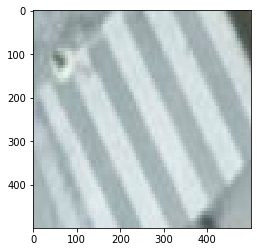

In [9]:
img = cv2.imread('52758.png')
plt.imshow(img)

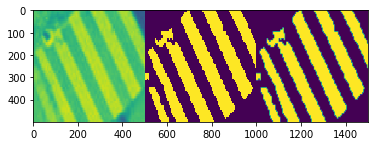

In [10]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
thresh, blackAndWhiteImage=cv2.threshold(gray,200,255, cv2.THRESH_BINARY)
blurb = cv2.GaussianBlur(blackAndWhiteImage,(7,7),2)
plt.imshow(np.hstack((gray,blackAndWhiteImage,blurb)))

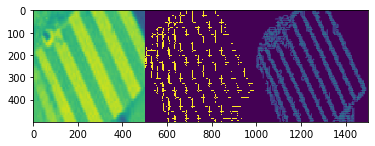

In [11]:
img = cv2.imread('52758.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
## sobel filter of 3*3 only gave the crossroad patter in edge image
edge=cv2.Canny(gray,22,212,apertureSize=3,L2gradient=True)
## gaussian kernel of 7*7 gave the best smoothing
blur = cv2.GaussianBlur(edge,(7,7),2)
plt.imshow(np.hstack((gray,edge,blur)))
## so far blackAndWhiteImage gave the promising visual for linedetection for cross-road.Let's apply HoughLinesP

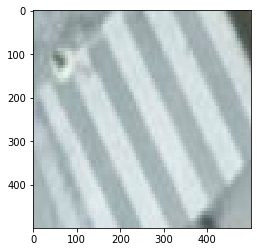

In [12]:
img1=img.copy()
img2=img.copy()
plt.imshow(img)

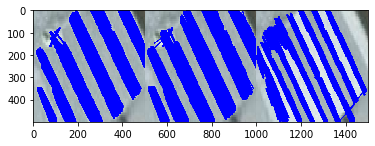

In [13]:
## Applying HoughLinesP for blackAndWhiteImage
linesP = cv2.HoughLinesP(blackAndWhiteImage, 1, np.pi /180,20, None, 70, 10)
if linesP is not None:
        for i in range(0, len(linesP)):
            l = linesP[i][0]
            cv2.line(img, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)
## Applying HoughLinesP for gaussian smoothing applied blackAndWhiteImage 
linesP = cv2.HoughLinesP(blurb, 1, np.pi /180,20, None, 70, 10)
if linesP is not None:
        for i in range(0, len(linesP)):
            l = linesP[i][0]
            cv2.line(img1, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)
linesP = cv2.HoughLinesP(blur, 1, np.pi /180,20, None, 70, 10)
## Applying HoughLinesP for gaussian smoothing applied cannyedged
if linesP is not None:
        for i in range(0, len(linesP)):
            l = linesP[i][0]
            cv2.line(img2, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)
plt.imshow(np.hstack((img,img1,img2)))
img = cv2.imread('52758.png')

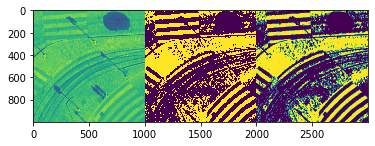

In [14]:
img = cv2.imread('16908.png')
plt.imshow(img)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
thresh, blackAndWhiteImage=cv2.threshold(gray,180,255, cv2.THRESH_BINARY) # try relacing lower threshold here to 180 and run HoughLinesP block below
#plt.figure(figsize=(10,20))
#plt.imshow(np.hstack((gray,blackAndWhiteImage)))
blurb = cv2.GaussianBlur(blackAndWhiteImage,(7,7),50)
plt.imshow(np.hstack((gray,blackAndWhiteImage,blurb)))

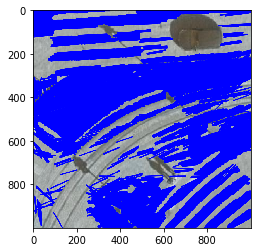

In [15]:
linesP = cv2.HoughLinesP(blurb,1, np.pi /180,20, None,70,10)
if linesP is not None:
        for i in range(0, len(linesP)):
            l = linesP[i][0]
            cv2.line(img, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)
plt.imshow(img)
img = cv2.imread('16908.png')
#The image has clearly captured zebra-cross but the middle section is also captured.

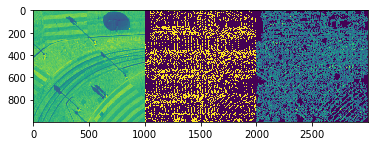

In [16]:
img = cv2.imread('16908.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edge=cv2.Canny(gray,7,200,apertureSize=3,L2gradient=True)
blur = cv2.GaussianBlur(edge,(3,3),2)
plt.imshow(np.hstack((gray,edge,blur)))
#plt.imshow(edge)